
# Machine Learning with Python

Welcome to the **Machine Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in machine learning. You will explore:

1. **Supervised Learning**
    - Regression algorithms
    - Classification algorithms
2. **Unsupervised Learning**
    - Clustering algorithms
    - Dimensionality reduction
3. **Fairness and Interpretability**
    - Interpretable methods
    - Bias evaluation
    
Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing machine learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


## Part1.2: Supervised learning - Classification on the Iris dataset
In this project, you will compare multiple classification model on the Iris dataset. The taks will include:  

1. **Import and Understand a Dataset**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Train a classification model**: Select and train a classification model using scikit-learn.
3. **Evaluate and plot the model performance**: Select a criterion to which you can evaluate the model, and plot its result.
4. **Compare multiple classification model, and get the best performance**: Compare multiple models, and find the best model to fit the data.

By the end of this project, you'll have a solid understanding of the different classification methods.

---

## Dataset

This exercise will use the **Iris dataset** (https://www.kaggle.com/datasets/uciml/iris).  
The Iris dataset is a classic dataset in machine learning that contains 150 samples of iris flowers, with 4 features per sample: sepal length, sepal width, petal length, and petal width. Each sample is labeled with one of three species: Setosa, Versicolor, or Virginica.  

This dataset can be accessed through scikt-learn API.    
Here, it is given to you in the `part1_supervised_learning/2_classification/classification_dataset.csv`.  
The code snippet below allows you to load the dataset.

In [52]:
import pandas as pd


#Import Iris dataset
df = pd.read_csv("classification_dataset.csv")

# Remove ID column
df = df.drop(columns=["id"])

## Data visualisation & Data Preparation :

**Your job**:
- Print the first 10 samples of the dataset.
    - What can you say about the available features?
- Plot the dataset using matplotlib plt.scatter method.

- Data cleaning
    - If necessary, take care of missing values.
    - The strategy used is up to you.
    - You can remove the sample, or fill the missing value with a strategy of your choice.
- Split features and targets.
    - The target is the column labelled as **"target"** in the Dataframe.
    - The features are all the other columns.
- Normalise the dataset between [0,1] using **StandardScaler** (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
    - Normalization ensures that all features contribute equally by scaling them to a common range, preventing models from being biased toward features with larger values. It also helps gradient-based algorithms converge faster and improves overall model performance.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Print the first 10 samples of the dataset:

In [54]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.1,2.8,4.7,1.2,1
1,NaN,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
5,5.4,3.4,1.5,0.4,0
6,5.6,2.9,3.6,1.3,1
7,6.9,3.1,5.1,2.3,2
8,6.2,2.2,4.5,1.5,1
9,5.8,2.7,3.9,1.2,1


---> remarque ici

##### data clean, split feature, normalise and visualisation:

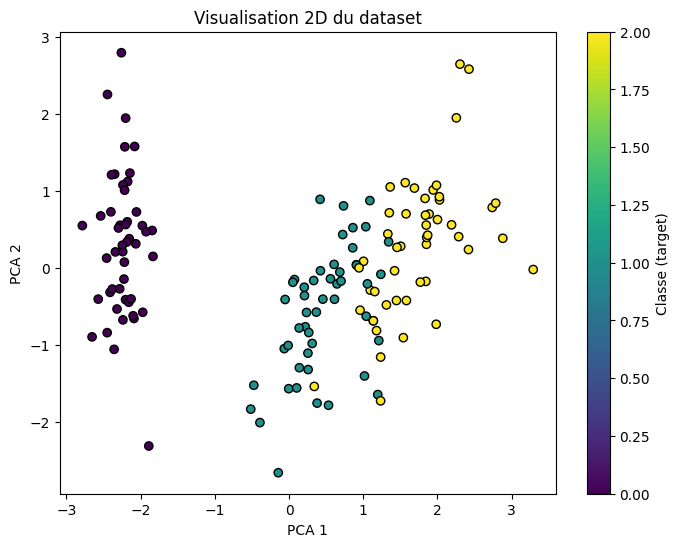

In [55]:
# Suppression des valeur nul
df_clean = df.dropna()

# Séparation des données 
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

# Normaliser
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap = "viridis",edgecolors="k")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation 2D du dataset")
plt.colorbar(label="Classe (target)")
plt.show()

## Training and evaluating a classification model using the hold out method

**Your job**:
- Train a model using the sklearn library (https://scikit-learn.org/stable/supervised_learning.html):
    - Divide the dataset into a train and test set using the holdout method.
    - Select an algorithm that we studied in the course.
    - Train the algorithm on the train set.
- Evaluate the model.
    - Compute the confusion matrix on the test set.
    - Copute the accuracy of the model for both the train and test set.


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [57]:
# Divide the dataset, 80% train and 20% test:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Creation du model Random Forest:
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Entrainer le model 
model.fit(X_train,y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation de la performance: calcul de l'accurancy
accuracy = accuracy_score(y_test,y_pred)
print(f"L'accuracy est de {accuracy * 100:.2f}%")




L'accuracy est de 100.00%


## Training and evaluating a classification model using cross-validation

**Your job**:
- Train a model using the sklearn library (https://scikit-learn.org/stable/supervised_learning.html):
    - Select another algorithm that we studied in the course.
    - Train the algorithm using K-folds cross validation.
- Evaluate the model.
    - Compute the confusion matrix on the test set.
    - Compute the accuracy of the model for both the train and test set.
- Compare the performance with the holdout method.

In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [60]:
# Creation du model KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialisation de la validation croisée K-Fold 
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(knn, X, y, cv=kfold)

# Entrainement sur l'ensemble de train 
knn.fit(X_train,y_train)

# Faire des prédiction sur l'ensemble de test 
y_pred_test = knn.predict(X_test)

# Faire des prediction sur l'ensemble d'entrainement
y_pred_train = knn.predict(X_train)



# Calcul de l'accuracy pour l'ensemble de test
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy sur le jeu de test : {accuracy_test:.4f}")

# Calcul de l'accuracy pour l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy sur le jeu d'entraînement : {accuracy_train:.4f}")

# Calcul de la matrice de confusion pour l'ensemble de test
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nMatrice de confusion sur le jeu de test :")
print(cm_test)

# Affichage des résultats
print(f"Scores de validation croisée (K-Folds) : {scores}")
print(f"Précision moyenne : {scores.mean()}")
print(f"Écart-type des scores : {scores.std()}")


# 

Accuracy sur le jeu de test : 1.0000
Accuracy sur le jeu d'entraînement : 0.9655

Matrice de confusion sur le jeu de test :
[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
Scores de validation croisée (K-Folds) : [1.         0.96551724 0.93103448 0.93103448 1.        ]
Précision moyenne : 0.9655172413793103
Écart-type des scores : 0.030842316931031594
